In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

## Teстовое задание WhoIsBlogger (WIB)
### Есть 2 группы студентов одна их которых ходила на подготовительные курсы, другая нет.
### Нужно понять повлияло ли посещение курсов на балл студентов.

загрузим файлы проведем EDA

In [105]:
groups = pd.read_csv('student_group.csv')

groups.head()

,student_id,group
0,1,no_course
1,2,course
2,3,course
3,4,course
4,5,course


In [106]:
bf_score = pd.read_csv('student_before_score.csv')

bf_score.head()

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


In [107]:
af_score =  pd.read_csv('student_after_score.csv')

af_score.head()

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


In [108]:
groups.shape

(1000, 2)

In [109]:
groups.duplicated().sum()

0

In [110]:
groups.isna().sum()

student_id    0
group         0
dtype: int64

In [111]:
bf_score.shape

(1000, 2)

In [112]:
bf_score.duplicated().sum()

0

In [113]:
bf_score.isna().sum()

student_id      0
before_score    0
dtype: int64

In [114]:
af_score.shape

(1000, 2)

In [115]:
af_score.duplicated().sum()

0

In [116]:
af_score.isna().sum()

student_id     0
after_score    0
dtype: int64

пропусков нет, мержим

In [117]:
df = groups.merge(bf_score, on = 'student_id', how = 'left').merge(af_score, on = 'student_id', how = 'left')

In [118]:
df.head()

,student_id,group,before_score,after_score
0,1,no_course,75,92
1,2,course,81,79
2,3,course,58,92
3,4,course,47,90
4,5,course,76,98


In [119]:
df['score_change'] = df.after_score - df.before_score

In [120]:
df.head()

,student_id,group,before_score,after_score,score_change
0,1,no_course,75,92,17
1,2,course,81,79,-2
2,3,course,58,92,34
3,4,course,47,90,43
4,5,course,76,98,22


In [121]:
df.group.value_counts()

no_course    512
course       488
Name: group, dtype: int64

Группы примерно одинковые. Для определения, повлияло ли прохождение курсов на результат сравню результаты тестов, распределения и среднее изменение баллов между группами студентов, которые посещали курсы, и теми, кто не посещал.

### Распределения score_change:

<Axes: xlabel='group', ylabel='score_change'>

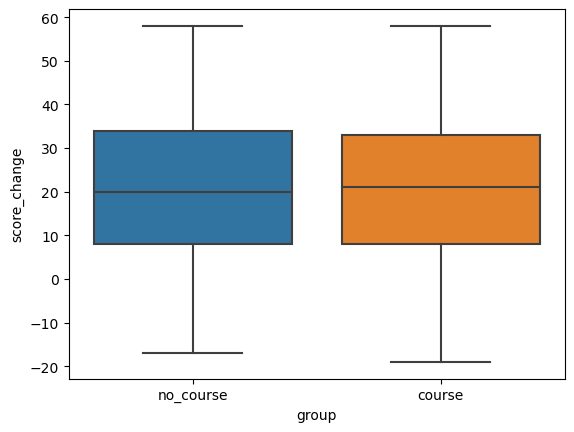

In [122]:
sns.boxplot(y = df.score_change, x = df.group)

выбросы отсутствуют

<Axes: xlabel='score_change', ylabel='Count'>

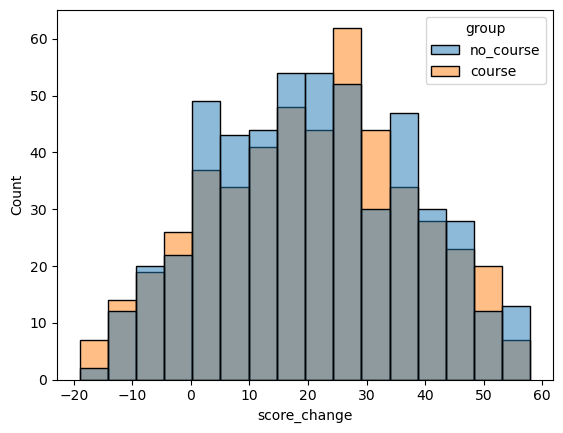

In [123]:
sns.histplot(data=df, x='score_change', hue='group')

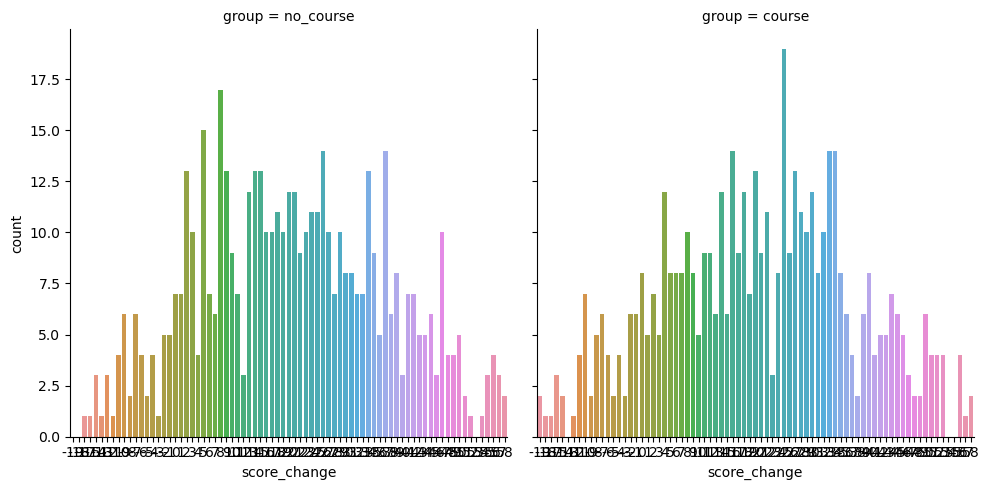

In [124]:
sns.catplot(data=df, x='score_change', col='group', kind = 'count')

Распределения изменений баллов напоминают нормальные и приблизительно похожи

Разобъю данные на группы

In [125]:
course_group = df[df['group'] == 'course']

no_course_group = df[df['group'] == 'no_course']

### Средние результаты и изменение в группе проходивших курсы:

In [126]:
avg_before_score_course = course_group['before_score'].mean()

avg_before_score_course

avg_before_score_course = course_group['before_score'].mean()

avg_before_score_course

avg_after_score_course = course_group['after_score'].mean()

avg_score_change_course

print(f'Средние результаты первого теста: {avg_before_score_course}, Средние результаты второго теста: {avg_after_score_course} , Изменение: {avg_score_change_course}')

Средние результаты первого теста: 63.30122950819672, Средние результаты второго теста: 83.90368852459017 , Изменение: 20.602459016393443


### Среднее изменение в группе НЕ проходивших курсы:

In [127]:
avg_before_score_no_course = no_course_group['before_score'].mean()

avg_before_score_no_course

avg_before_score_no_course = no_course_group['before_score'].mean()

avg_before_score_no_course

avg_after_score_no_course = no_course_group['after_score'].mean()

avg_score_change_no_course

print(f'Средние результаты первого теста: {avg_before_score_no_course}, Средние результаты второго теста: {avg_after_score_no_course} , Изменение: {avg_score_change_no_course}')

Средние результаты первого теста: 64.51953125, Средние результаты второго теста: 85.30859375 , Изменение: 20.7890625


Средние показатели улучшения баллов схожи в обеих группах, независимо от того, посещали студенты курсы или нет. Это может указывать на то, что посещение подготовительных курсов не оказало значительного влияния на улучшение баллов студентов по сравнению с теми, кто курсы не посещал.

Однако, для более точного анализа и выводов, проведу статистический тест

Т-тест подойдет для сравнения средних двух независимых выборок, но нужно убедиться что наши распределения позволяют применять данный кретерий. Для этого сначала проведем тест распределений на нормальность и гомоскедантичность (равенство диспрерсий) 

### Тест Шапиро Уилка на нормальность 

H0 - распределения нормальные 

H1 - распределения отличаются от нормальных

In [128]:
normality_test_course = stats.shapiro(course_group['score_change'])
normality_test_no_course = stats.shapiro(no_course_group['score_change'])

normality_test_course, normality_test_no_course

(ShapiroResult(statistic=0.9900513291358948, pvalue=0.002199470764026046),
 ShapiroResult(statistic=0.9884452819824219, pvalue=0.00045267381938174367))

### Тест Левена на раверство диспрерсий 

H0 - дисперсии равны

H1 - диспресии статистически различаются

In [129]:
variance_equality_test = stats.levene(course_group['score_change'], no_course_group['score_change'])

variance_equality_test

LeveneResult(statistic=0.09598080231597139, pvalue=0.7567718825346266)

Результаты тестов показывают что оба распределения отличаются от нормальных, но дисперсии в группах не имеют статистических различий. 
Отличие от нормальности по прежнему позволяет нам использовать Т-кретерий, так как он  может быть достаточно устойчив к этому, особенно при больших размерах выборок. Гомоскедантичность позволяет нам использовать версию Т-Тест Стьюдента.
Мы так же могли бы использовать непараметрический аналог Т-теста - Манна-Уитни, но в виду сложности его интерпретации и размера выботки остановлюсь на Т-Тесте Стьюдента

H0 - средние изменения в группах не имеют стат. значимых различий
H1 - средние изменения в группах имеют стат. значимые различия

In [130]:
student_t_test = stats.ttest_ind(course_group['score_change'], no_course_group['score_change'], equal_var=True)
student_t_test

Ttest_indResult(statistic=-0.17522880152096795, pvalue=0.8609353980949603)

p-значение значительно выше порога 0.05, что указывает на отсутствие статистически значимых различий между средними изменениями баллов студентов, которые посещали подготовительные курсы, и теми, кто их не посещал.

## Финальные результаты:

### Оценка эффективности прохождения подготовительных курсов. 

### Этапы анализа:
    1. Загрузка данных
    
    2. Проверка на дубликаты, аномалии
        - дубликатов нет
        - выбрасов не выявлено
        
    3.Объединение данных
    
    4.Проверка распределения по группам (course/ no_course)
        -выборки примерно одинаковые
        
    5.Выбор метрики оценки результатов прохождения курсов
        - принято решение сравнивать разницу между результатами первого и второго теста, в группах course и no_course
        
    6.Построение графиков распределения выбранной метрики
    
    7.Выбор статистического кретериия для определения являлется ли разница между метриками статистически значимой.
    
    8.Оценка результатов эксперемента

### Результаты
Среднияя разница между результами первого и второго теста в группе посещающей подготовительные курсы - 20.602459016393443, не посещающей - 20.7890625
Разница между изменениями не является статистически значимой. 

### Вывод:
Посещение подготовительных курсов не оказало статистически значимого влияния на изменение баллов студентов